<a href="https://colab.research.google.com/github/Olatim18/Study_Pyton/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22My_KmeansExample_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the numpy and pillow modules, let's load an image and convert it to a 3D array. Each pixel contains the intensity value of three colors (red, green, blue) from 0 to 256

In [ ]:
import numpy as np
from PIL import Image 
import pandas as pd   

img = np.asarray(Image.open('image.jpg').convert('RGB'), dtype='uint8')
print(np.shape(img))


(133, 200, 3)


transform the 3D array into a table where each column corresponds to a pixel's color intensity value (0-Red, 1-Green, 2-Blue)


In [ ]:
dt = pd.DataFrame(img.reshape(-1,).reshape(img.shape[2], img.shape[0] * img.shape[1]).T)
print(dt)


         0    1   2
0       20  134  64
1       44  176   2
2        8  162   0
3       17  136  65
4       43  172   1
...    ...  ...  ..
26595  209    0  24
26596  153    0   2
26597  130   65   1
26598  191    0  25
26599  159    0   3

[26600 rows x 3 columns]


visualize the table using 3D graphics

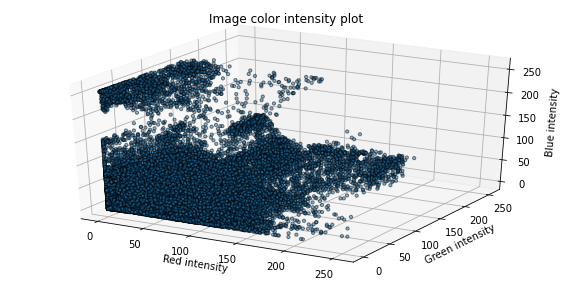

In [ ]:
# plot of image
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dt[0], dt[1], dt[2], cmap='viridis',
           edgecolor='k', s=10, alpha = 0.5)

ax.set_title("Image color intensity plot")
ax.set_xlabel("Red intensity")
ax.set_ylabel("Green intensity")   
ax.set_zlabel("Blue intensity") 
plt.show()

Apply the K-means clustering method using sklearn. 
The algorithm of this method is the following:
1. Determine the number of clusters (K) to which we need to distribute the data.
2. We choose the initial centers of the clusters at random.
3. Calculate the distance from each center to each pixel. This distance is considered as the Euclidean distance between points in space, and in our case - as the distance between the three color components.
4. Distribute the points into clusters with the smallest distance to the center. For the center, the distance to which is the smallest, we recalculate the coordinates as the arithmetic mean between each center and each point of the cluster. The center shifts in space according to the calculations.
5. After recalculating all the centers, we distribute the pixels into clusters, comparing the distance from each pixel to the centers. A pixel is placed in a cluster, to the center of which it is located closer than to the other centers.
6. Repeat iterations until the pixels remain in the same clusters.


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(dt)


KMeans(n_clusters=4)

The coordinates of the cluster centers are following:

In [ ]:
print(kmeans.cluster_centers_)

[[ 16.45502762  41.55918969  30.76176796]
 [ 54.25162127 184.60014823  25.12414304]
 [ 20.43877551  56.19920142 230.88464951]
 [108.36099739  29.33569036  30.80945292]]


Visualize the resulting cluster using 2D and 3D graphs

In [ ]:
ml = dt.values.tolist()
x = [i[0] for i in my_list]
y = [i[1] for i in my_list]
z = [i[2] for i in my_list]


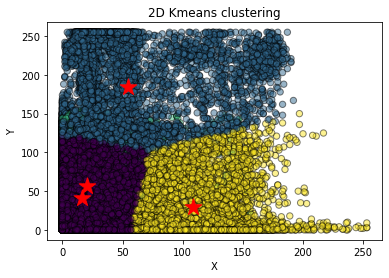

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c=kmeans.labels_, cmap='viridis',
           edgecolor='k', s=40, alpha = 0.5)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 300, c = 'r', marker='*', label = 'Centroid')
ax.set_title("2D Kmeans clustering")
ax.set_xlabel("X")
ax.set_ylabel("Y")   
plt.show()

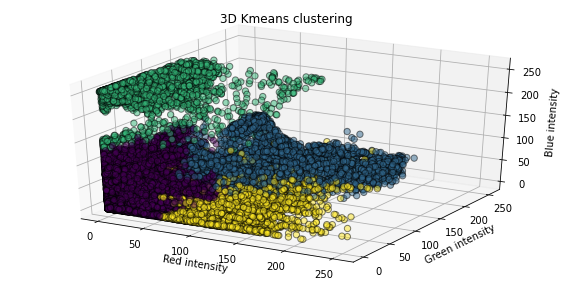

In [ ]:
# plot clusters and centroids
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z ,c=kmeans.labels_, cmap='viridis',
           edgecolor='k', s=40, alpha = 0.5)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s = 300, c = 'r',
           marker='*', label = 'Centroid')
ax.set_title("3D Kmeans clustering")
ax.set_xlabel("Red intensity")
ax.set_ylabel("Green intensity")   
ax.set_zlabel("Blue intensity") 
plt.show()

K-means clustering offers the following benefits:
- fast algorithm
- can handle large datasets well

However, it has the following potential disadvantages:
- requires us to specify the number of clusters before running the algorithm
- sensitive to outliers